In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import numpy as nps
from tqdm import tqdm

In [2]:
# read data
train = pd.read_pickle(r'C:\Users\faith\OneDrive\Documents\FaithZhang\SURF\RealTimeDetection\training\train_set.pkl')
#test = pd.read_pickle( 'test_set.pkl')
#test_modified = pd.read_pickle( 'test_set.pkl')

In [3]:
# read data
#train = pd.read_pickle( 'train_set.pkl')
test = pd.read_pickle(r'C:\Users\faith\OneDrive\Documents\FaithZhang\SURF\RealTimeDetection\testing\test_set.pkl')
#test_modified = pd.read_pickle( 'test_set.pkl')

Reading the train and test data to see the relevant features:

In [4]:
train[:26]


,hadm_id,arterial_bp_diastolic_min,arterial_bp_mean_min,arterial_bp_systolic_min,cvp_min,heart_rate_min,spo2_min,pap_diastolic_min,pap_mean_min,pap_systolic_min,...,mild_liver_disease,diabetes_without_cc,diabetes_with_cc,paraplegia,renal_disease,malignant_cancer,severe_liver_disease,metastatic_solid_tumor,aids,AKI_in_24
0,25630745.0,58.000000,72.000000,91.232339,NaN,92.000000,97.000000,16.751394,22.127090,30.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,25630745.0,62.000000,76.000000,102.000000,NaN,84.000000,96.000000,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,25630745.0,50.000000,66.000000,90.000000,NaN,82.640342,98.000000,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,25630745.0,47.000000,61.000000,86.000000,NaN,84.000000,93.000000,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25630745.0,53.000000,64.000000,94.000000,NaN,90.000000,93.000000,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,25630745.0,54.000000,65.000000,93.000000,NaN,87.000000,94.000000,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,27954417.0,51.000000,65.000000,93.000000,NaN,72.000000,95.000000,6.000000,13.870744,21.714945,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,27954417.0,12.000000,21.000000,36.000000,20.000000,48.000000,77.749362,8.000000,18.000000,32.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,27954417.0,47.896593,58.075912,80.717274,NaN,99.537956,94.000000,17.537956,28.537956,48.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,27954417.0,53.000000,60.000000,96.000000,NaN,93.000000,90.000000,14.000000,24.000000,35.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
test[test['hadm_id']==20955149]
#times are the same patient information recorded at every hour from time 1 to time xxx; depending on how long they were in the icu

#INFO TO DELETE: hadm_id and time 

,time,hadm_id,arterial_bp_diastolic_min,arterial_bp_mean_min,arterial_bp_systolic_min,cvp_min,heart_rate_min,spo2_min,pap_diastolic_min,pap_mean_min,...,mild_liver_disease,diabetes_without_cc,diabetes_with_cc,paraplegia,renal_disease,malignant_cancer,severe_liver_disease,metastatic_solid_tumor,aids,AKI_in_24
71,0,20955149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,1,20955149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,2,20955149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,3,20955149,62.470588,77.823529,101.529412,NaN,82.0,100.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,4,20955149,62.470588,77.823529,101.529412,NaN,68.954492,100.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,5,20955149,62.470588,77.823529,101.529412,NaN,68.709988,100.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,6,20955149,62.470588,77.823529,101.529412,NaN,68.709988,100.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,7,20955149,57.44,72.0,93.56,NaN,68.709988,100.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,8,20955149,57.44,72.0,93.56,NaN,68.709988,100.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,9,20955149,57.44,72.0,93.56,NaN,68.709988,100.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# LR Model!

In [7]:
test_path= 'auto_gluonModels/daily_target_accuracy_penaltyLR'
new_train = train.drop(columns= ['hadm_id'])

hyperparameters = {
    'LR': [
            {'penalty': 'L2', 'ag_args':{'name_suffix':'L2'}},
            {'penalty': 'L1', 'ag_args':{'name_suffix':'L1'}},
            ]
}
# Replace 'target_column_name' with the name of your target column
predictor = TabularPredictor(label='AKI_in_24', path = test_path, )
predictions= predictor.fit(train.drop( columns = ['hadm_id']), 
              hyperparameters=hyperparameters, 
              presets='best_quality')

              #ag_args_fit = {'num_gpus':1}, # comment out this line if no GPU used


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.8.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
CPU Count:          12
Memory Avail:       9.22 GB / 31.67 GB (29.1%)
Disk Space Avail:   79.59 GB / 474.72 GB (16.8%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stacked overfitting.
	Running DyStack for up to

Evaluating the results and putting the test data into the model. These are general stats:

In [6]:
columns_to_drop = ['time', 'hadm_id']
new_test = test.drop(columns=columns_to_drop) #actually this is unnecessary, as autogluon will ignore columns the test data has but training data does't have. 

In [7]:
predictor = TabularPredictor.load("./auto_gluonModels/daily_target_accuracy_penaltyLR")


In [10]:
#AttributeError: 'TabularPredictor' object has no attribute 'print_summary'

# testdf= pd.DataFrame(test)
presults= predictor.predict(test)

In [11]:
performance = predictor.evaluate(test)
performance

{'accuracy': 0.7796961797262069,
 'balanced_accuracy': 0.7473166262413924,
 'mcc': 0.5170260990524451,
 'roc_auc': 0.8282718987898461,
 'f1': 0.6771606296377782,
 'precision': 0.7452672360658624,
 'recall': 0.6204596268738775}

In [12]:
y_pred_proba = predictor.predict_proba(test)

NOTE!!!: make sure to account for cases where most of the data is NaN

In [13]:
y_pred_proba.iloc[0:20]


,0,1
0,0.277147,0.722853
1,0.976557,0.023443
2,0.987704,0.012296
3,0.984369,0.015631
4,0.988271,0.011729
5,0.987408,0.012592
6,0.989343,0.010657
7,0.988775,0.011225
8,0.986203,0.013797
9,0.986668,0.013332


we reassign ids back to the predictions so we can more easily plot them.

In [14]:
predictions.head()

AttributeError: 'TabularPredictor' object has no attribute 'head'

In [ ]:
df_predictions= pd.DataFrame({
    'time': test['time'],
    'hadm_id': test['hadm_id'],
    'Prediction: Risk of AKI': y_pred_proba[1],
    'Actual AKI Risk Result': test['AKI_in_24']
})

df_predictions.to_csv('LRpredictions.csv', index=False)


In [ ]:
importance_scores = predictor.feature_importance(test)

print(importance_scores)

Models with best effect:

In [ ]:
predictor.leaderboard( test, silent = True, extra_metrics = [ 'roc_auc' ])

,model,score_test,roc_auc,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LinearModelL1_BAG_L1,0.779628,0.828277,0.790386,accuracy,20.706098,7.111146,19.350305,20.706098,7.111146,19.350305,1,True,2
1,WeightedEnsemble_L2,0.779628,0.828278,0.790558,accuracy,44.107848,11.723032,68.846983,0.000000,0.008017,0.072616,2,True,3
2,LinearModelL2_BAG_L1,0.779601,0.828281,0.790215,accuracy,23.401750,4.603869,49.424062,23.401750,4.603869,49.424062,1,True,1


#### ROC_AUC Analysis Of The Model

In [15]:
model_path = 'auto_gluonModels/daily_target_roc_auc_penaltyLR'

hyperparameters = {
    'LR': [
            {'penalty': 'L2', 'ag_args':{'name_suffix':'L2'}},
            {'penalty': 'L1', 'ag_args':{'name_suffix':'L1'}},
            ]
}
# Replace 'target_column_name' with the name of your target column
predictor = TabularPredictor(label='AKI_in_24', path = model_path, eval_metric= "roc_auc" )
predictor.fit(train.drop( columns = ['hadm_id']), 
              hyperparameters=hyperparameters, 
              #ag_args_fit = {'num_gpus':1}, # comment out this line if no GPU used
              presets='best_quality')

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.8.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
CPU Count:          12
Memory Avail:       15.87 GB / 31.67 GB (50.1%)
Disk Space Avail:   78.80 GB / 474.72 GB (16.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stacked overfitting.
	Running DyStack for up t

In [17]:
predictor = TabularPredictor.load("auto_gluonModels/daily_target_roc_auc_penaltyLR")
predictor.evaluate(test, silent = True) #get rid of test.drop time and axis =1

{'roc_auc': 0.8282718983913067,
 'accuracy': 0.7796961797262069,
 'balanced_accuracy': 0.7473166262413924,
 'mcc': 0.5170260990524451,
 'f1': 0.6771606296377782,
 'precision': 0.7452672360658624,
 'recall': 0.6204596268738775}

#### Balanced Accuracy Analysis Of The Model

In [19]:
model2_path = 'auto_gluonModels/daily_target_balanced_accuracy_penaltyLR'


hyperparameters = {
    'LR': [
            {'penalty': 'L2', 'ag_args':{'name_suffix':'L2'}},
            {'penalty': 'L1', 'ag_args':{'name_suffix':'L1'}},
            ]
}
# Replace 'target_column_name' with the name of your target column
predictor = TabularPredictor(label='AKI_in_24', path = model2_path, eval_metric= "balanced_accuracy" )
predictor.fit(train.drop( columns = ['hadm_id']), 
              hyperparameters=hyperparameters, 
              #ag_args_fit = {'num_gpus':1}, # comment out this line if no GPU used
              presets='best_quality')

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.8.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
CPU Count:          12
Memory Avail:       10.39 GB / 31.67 GB (32.8%)
Disk Space Avail:   78.79 GB / 474.72 GB (16.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stacked overfitting.
	Running DyStack for up t

In [ ]:
predictor = TabularPredictor.load("ag_models/daily_target_balanced_accuracy_penaltyLR")
predictor.evaluate(test, silent = True) #get rid of test.drop time and axis =1

{'balanced_accuracy': 0.747247353338883,
 'accuracy': 0.7796279361786344,
 'mcc': 0.5168750156321017,
 'roc_auc': 0.8282768825235767,
 'f1': 0.6770670826833073,
 'precision': 0.7451463790446842,
 'recall': 0.6203863211523659}

# quick result code

figure this out whenever you can.

In [ ]:
predictor = TabularPredictor.load("auto_gluonModels/daily_target_accuracy_penaltyLR")
predictions= predictor.predict_proba(test) #holds probability predictions for test of data
risk= predictions.iloc[:,1] #store class 1 predictions into risk
len(train['AKI_in_24'])
print("lengths", len(train), len(test))

sklearn.metrics.roc_auc_score(train['AKI_in_24'], risk)

## Sliding Window Code

"inform" is the dataset that indicates:

    a. whether or not a patient gets AKI and 
    b. what hour AKI was developed.

In [ ]:
#predictor = TabularPredictor.load("auto_gluonModels/ag_AKI_in_24/")
inform = pd.read_pickle('inform.pkl')
inform= inform.dropna()
inform.max()

top_5_values = inform.nlargest(10, 'first_AKI_detected')
top_5_values
#so the latest detection of aki would be around 2 weeks post-operation

,hadm_id,if_AKI_inICU,first_AKI_detected
0,24582156.0,1.0,355.0
0,27710782.0,1.0,194.0
0,28752337.0,1.0,177.0
0,28482378.0,1.0,148.0
0,24123980.0,1.0,138.0
0,25834105.0,1.0,136.0
0,28257074.0,1.0,112.0
0,27325406.0,1.0,105.0
0,25316242.0,1.0,99.0
0,27119016.0,1.0,82.0


here is a list of the times, which are basically hundreds of numbers labeled from 1 to 971. This indicates the patient that stayed the longest in the ICU would be a patient that stayed there for 971 hours, or about 2 weeks.

In [ ]:
time_list = np.unique( test['time'] )
len(time_list)
time_list

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

The time records table is an HOURLY breakdown of predictions and prediction at every hour of the icu.

In [ ]:
# this took too long to run in the notebook;
# so run it in .py form
# results saved as time_records_table.pkl -> ACTUALLY it's stored in time_records_table_accuracy.pkl

time_records_table = pd.DataFrame( columns = ['time', 'accuracy', 'balanced_accuracy', 'roc_auc',
                                              'f1', 'precision', 'recall', 'NumOfPatients', 'NumOfAKI',
                                              'RatioOfAKI'] )

for time_id in tqdm(time_list): #will loop 972 time for every single time. time_id= a number from 0 to 971
    time_test_table = test.loc[ test['time'] == time_id ].drop( ['time', 'hadm_id'], axis = 1) #match time table to time list entries
    if len(np.unique(test.loc[ test['time'] == time_id, 'AKI_in_24' ])) == 1: #np.unique returns the sorted unique elements of an array or a list.
        break #once it hits the hour where 100% patients have aki, it stops.
    tv_eva = predictor.evaluate( time_test_table  , silent = True)
    add_table = pd.DataFrame( data =  np.array([ time_id, tv_eva['accuracy'], tv_eva['balanced_accuracy'], tv_eva['roc_auc'], tv_eva['f1'], tv_eva['precision'], 
                     tv_eva['recall'], len(time_test_table), time_test_table['AKI_in_24'].sum(), time_test_table['AKI_in_24'].sum()/len(time_test_table) ]).reshape([1,-1]),
                                columns = time_records_table.columns.values)
    time_records_table = pd.concat( [time_records_table, add_table], ignore_index = True)
    
time_records_table.to_pickle('time_records_table.pkl')

  0%|          | 0/972 [00:00<?, ?it/s]C:\Users\faith\AppData\Local\Temp\ipykernel_8548\2507400512.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  time_records_table = pd.concat( [time_records_table, add_table], ignore_index = True)
  0%|          | 1/972 [00:04<1:05:17,  4.03s/it]


KeyboardInterrupt: 

These are time table record results. It only goes to hour 501, because after hour 501, all 6 remaining patients in the ICU have developed AKI at this point. 

In [ ]:
#TIME RECORDS TABLE USING THE ENSEMBLE METHODS
time_records_table= pd.read_pickle('./time_records_zijian/time_records_table_target_accuracy.pkl')
time_records_table

,time,accuracy,balanced_accuracy,roc_auc,f1,precision,recall,NumOfPatients,NumOfAKI,RatioOfAKI
0,0.0,0.861362,0.504941,0.437134,0.034286,0.250000,0.018405,1219.0,163.0,0.133716
0,1.0,0.855721,0.520196,0.548643,0.093750,0.409091,0.052941,1206.0,170.0,0.140962
0,2.0,0.843464,0.530652,0.623681,0.137615,0.405405,0.082873,1201.0,181.0,0.150708
0,3.0,0.827903,0.544414,0.669193,0.188976,0.421053,0.121827,1197.0,197.0,0.164578
0,4.0,0.824268,0.567288,0.698406,0.255319,0.486486,0.173077,1195.0,208.0,0.174059
...,...,...,...,...,...,...,...,...,...,...
0,497.0,0.833333,0.750000,1.000000,0.888889,0.800000,1.000000,6.0,4.0,0.666667
0,498.0,0.833333,0.750000,1.000000,0.888889,0.800000,1.000000,6.0,4.0,0.666667
0,499.0,0.666667,0.400000,0.800000,0.800000,0.800000,0.800000,6.0,5.0,0.833333
0,500.0,0.666667,0.400000,0.800000,0.800000,0.800000,0.800000,6.0,5.0,0.833333


# Visualizations (from Zijian's Ensemble Model)

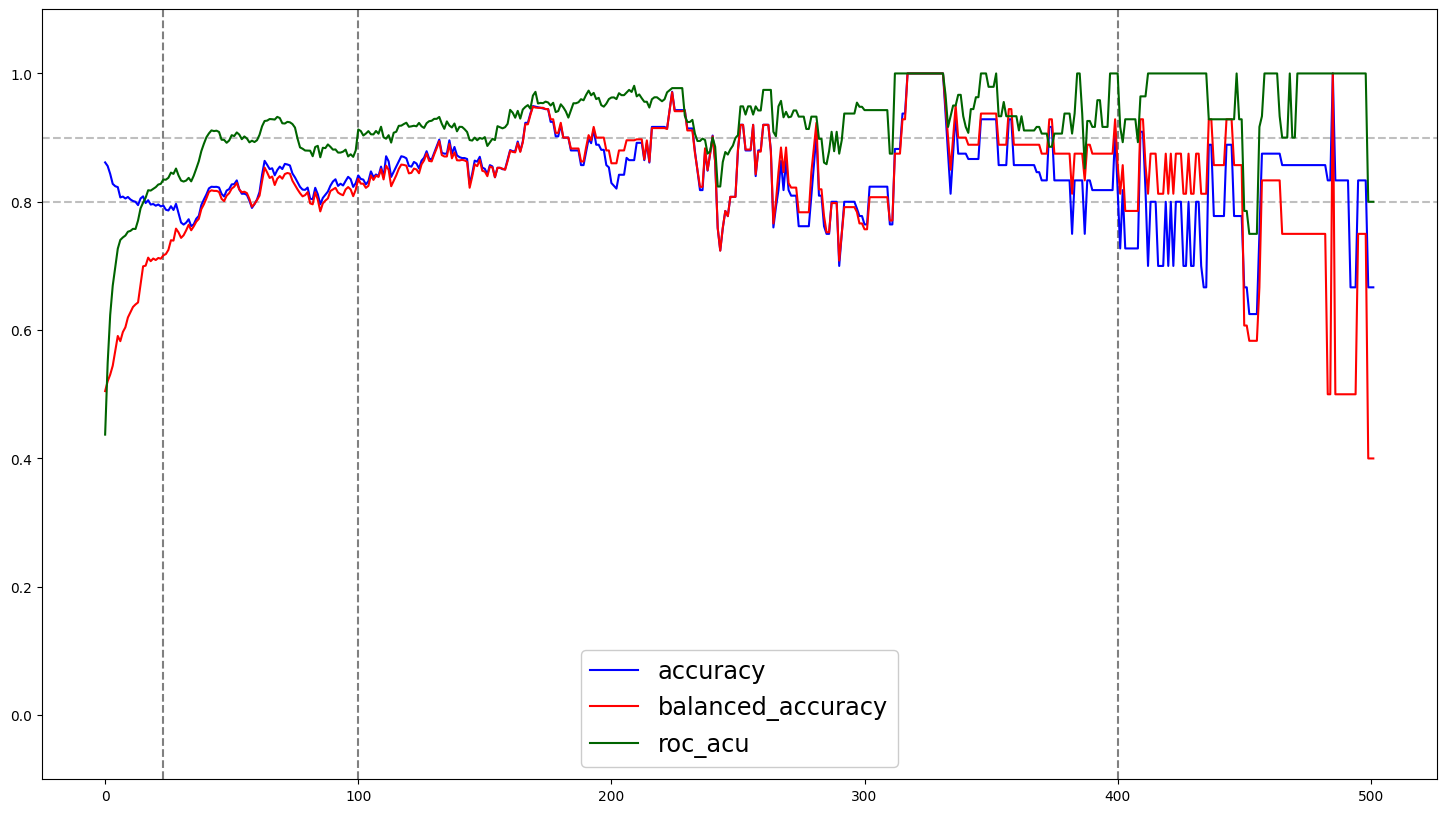

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
fig, axs = plt.subplots(1,1, figsize = (18,10), dpi = 100)

#axs.set_title(r'Trace plots of $\pi_j$' )
axs.set_ylim([-0.1,1.1])
#axs.set_xlim([-10,(maxiter+10)])
axs.axvline( x = 23, color = 'gray', linestyle = '--')
axs.axhline( y = 0.9 ,color = 'gray', linestyle = '--', alpha = 0.5)
axs.axhline( y = 0.8 ,color = 'gray', linestyle = '--', alpha = 0.5)

axs.axvline( x = 100, color = 'gray', linestyle = '--')
axs.axvline( x = 400, color = 'gray', linestyle = '--')

axs.plot( time_records_table['time'], time_records_table['accuracy'], color = 'blue', label = 'accuracy')
axs.plot( time_records_table['time'], time_records_table['balanced_accuracy'], color = 'red', label = 'balanced_accuracy')
axs.plot( time_records_table['time'], time_records_table['roc_auc'], color = 'darkgreen', label = 'roc_acu')
axs.legend( loc = 'lower center', framealpha = 1, fontsize = 'xx-large')

# plt.show()
plt.savefig( './plots/accroc.png', dpi = 100, bbox_inches = 'tight')


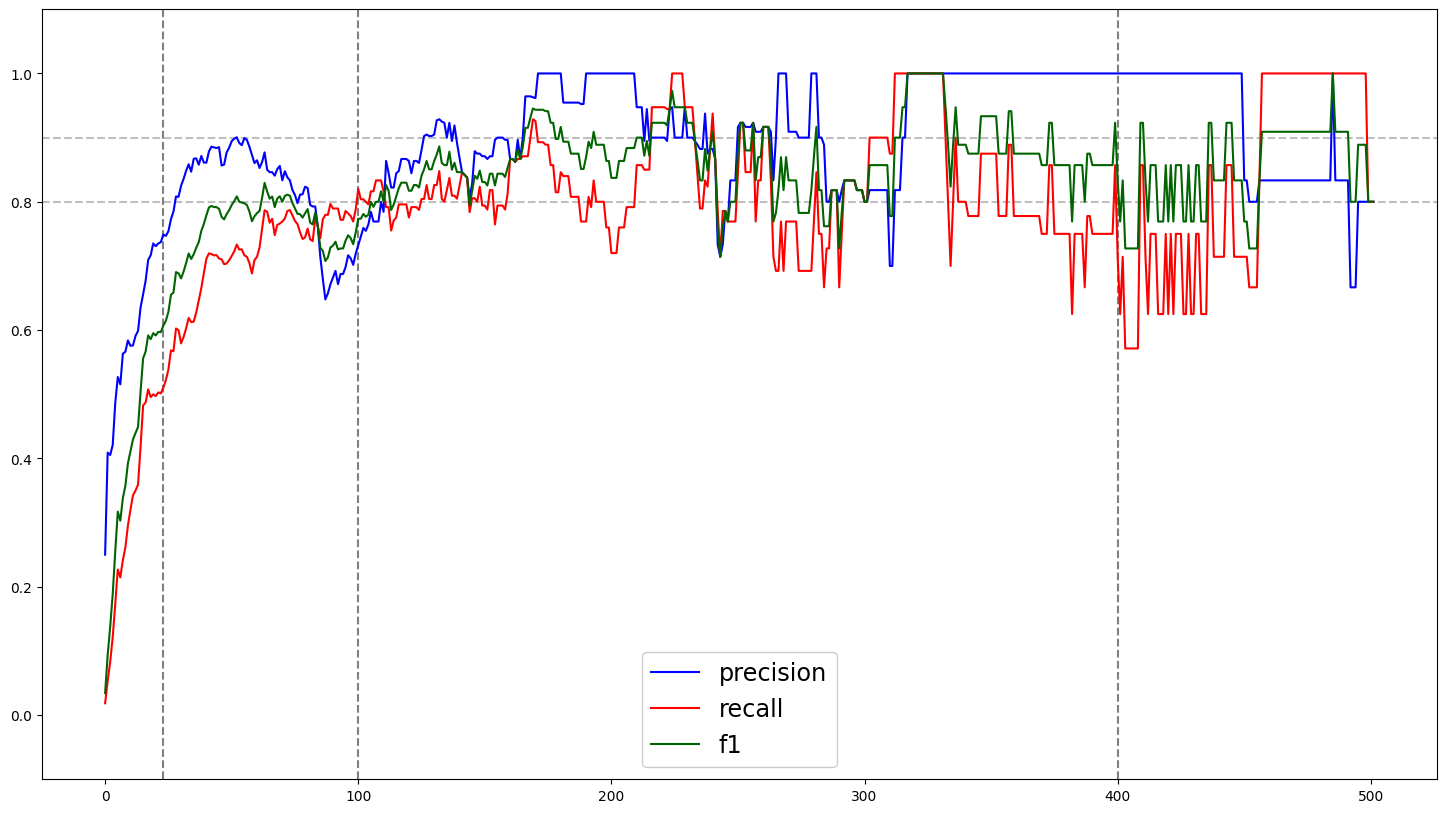

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1,1, figsize = (18,10), dpi = 100)

#axs.set_title(r'Trace plots of $\pi_j$' )
axs.set_ylim([-0.1,1.1])
#axs.set_xlim([-10,(maxiter+10)])
axs.axvline( x = 23, color = 'gray', linestyle = '--')
axs.axhline( y = 0.9 ,color = 'gray', linestyle = '--', alpha = 0.5)
axs.axhline( y = 0.8 ,color = 'gray', linestyle = '--', alpha = 0.5)

axs.axvline( x = 100, color = 'gray', linestyle = '--')
axs.axvline( x = 400, color = 'gray', linestyle = '--')

axs.plot( time_records_table['time'], time_records_table['precision'], color = 'blue', label = 'precision')
axs.plot( time_records_table['time'], time_records_table['recall'], color = 'red', label = 'recall')
axs.plot( time_records_table['time'], time_records_table['f1'], color = 'darkgreen', label = 'f1')

axs.legend( loc = 'lower center', framealpha = 1, fontsize = 'xx-large')

# plt.show()
plt.savefig( './plots/prerec.png', dpi = 100, bbox_inches = 'tight')


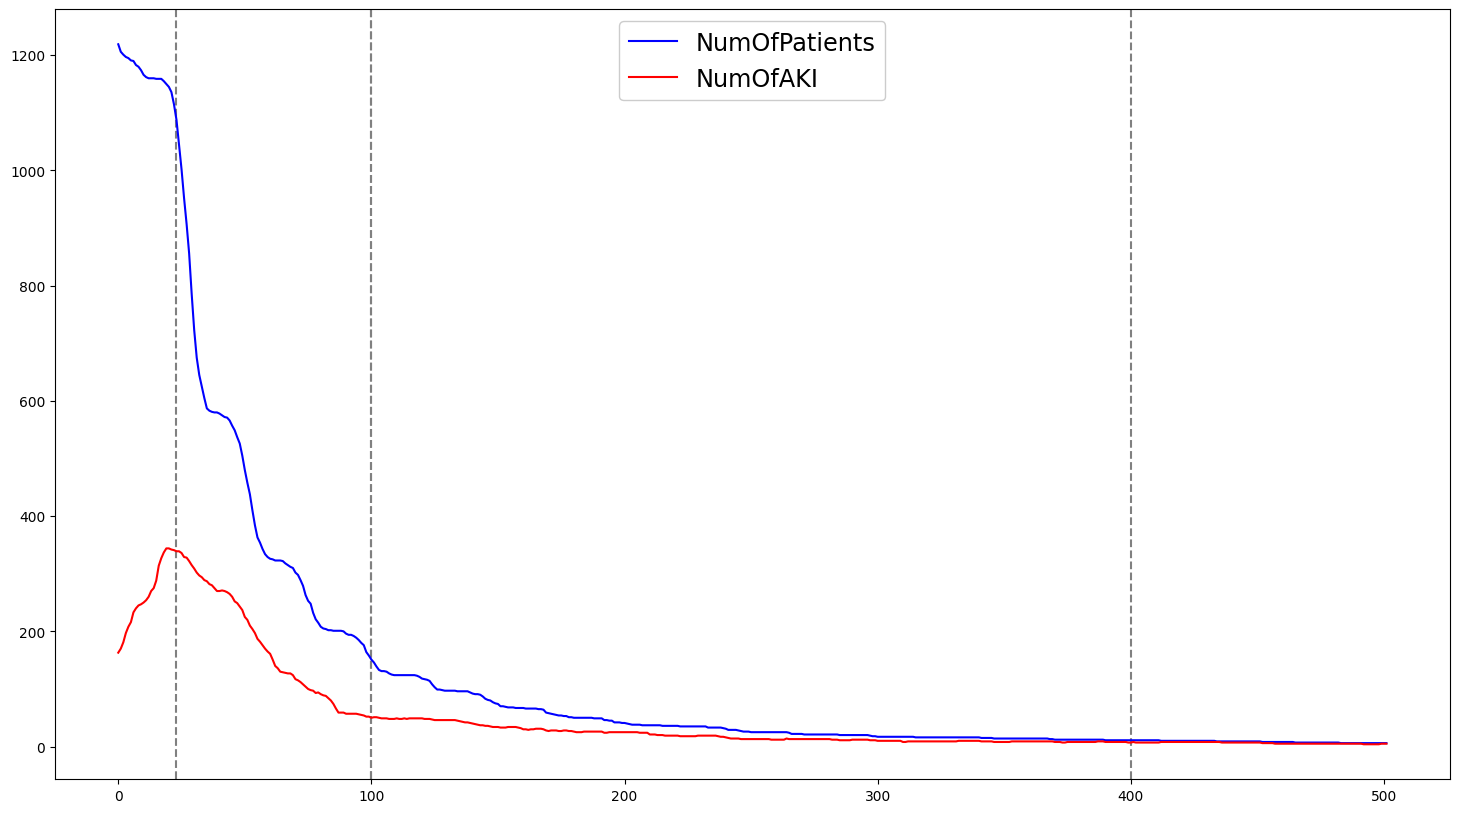

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1,1, figsize = (18,10), dpi = 100)

#axs.set_title(r'Trace plots of $\pi_j$' )
#axs.set_ylim([-0.1,1.1])
#axs.set_xlim([-10,(maxiter+10)])
axs.axvline( x = 23, color = 'gray', linestyle = '--')
axs.axvline( x = 100, color = 'gray', linestyle = '--')

axs.axvline( x = 100, color = 'gray', linestyle = '--')
axs.axvline( x = 400, color = 'gray', linestyle = '--')

axs.plot( time_records_table['time'], time_records_table['NumOfPatients'], color = 'blue', label = 'NumOfPatients')
axs.plot( time_records_table['time'], time_records_table['NumOfAKI'], color = 'red', label = 'NumOfAKI')
axs.legend( loc = 'upper center', framealpha = 1, fontsize = 'xx-large')

# plt.show()
plt.savefig( './plots/ns.png', dpi = 100, bbox_inches = 'tight')


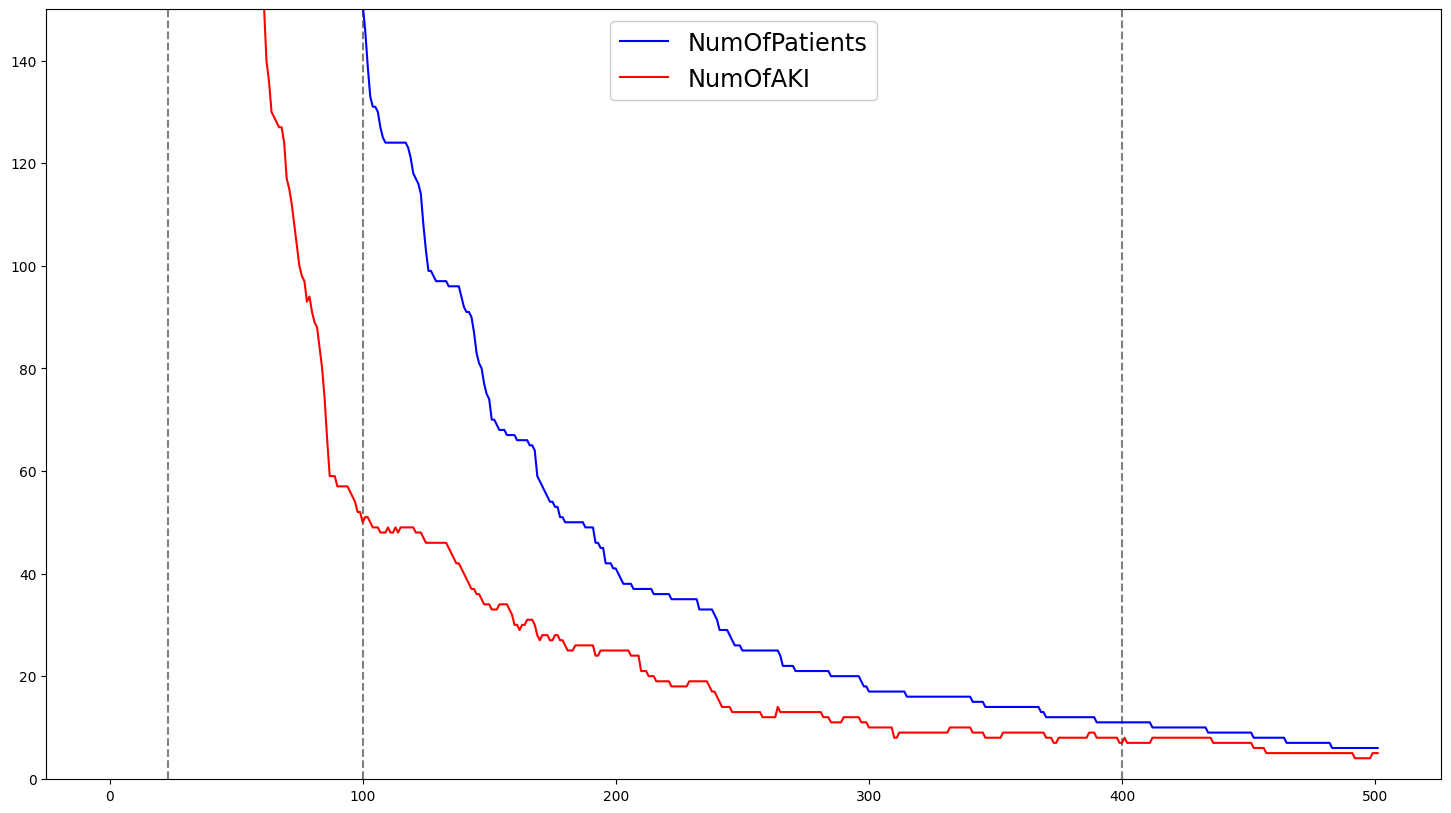

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1,1, figsize = (18,10), dpi = 100)

#axs.set_title(r'Trace plots of $\pi_j$' )
axs.set_ylim([-0.1,150])
#axs.set_xlim([-10,(maxiter+10)])
axs.axvline( x = 23, color = 'gray', linestyle = '--')
axs.axvline( x = 100, color = 'gray', linestyle = '--')
axs.axvline( x = 400, color = 'gray', linestyle = '--')

axs.plot( time_records_table['time'], time_records_table['NumOfPatients'], color = 'blue', label = 'NumOfPatients')
axs.plot( time_records_table['time'], time_records_table['NumOfAKI'], color = 'red', label = 'NumOfAKI')
axs.legend( loc = 'upper center', framealpha = 1, fontsize = 'xx-large')

# plt.show()
plt.savefig( './plots/ns_100.png', dpi = 100, bbox_inches = 'tight')


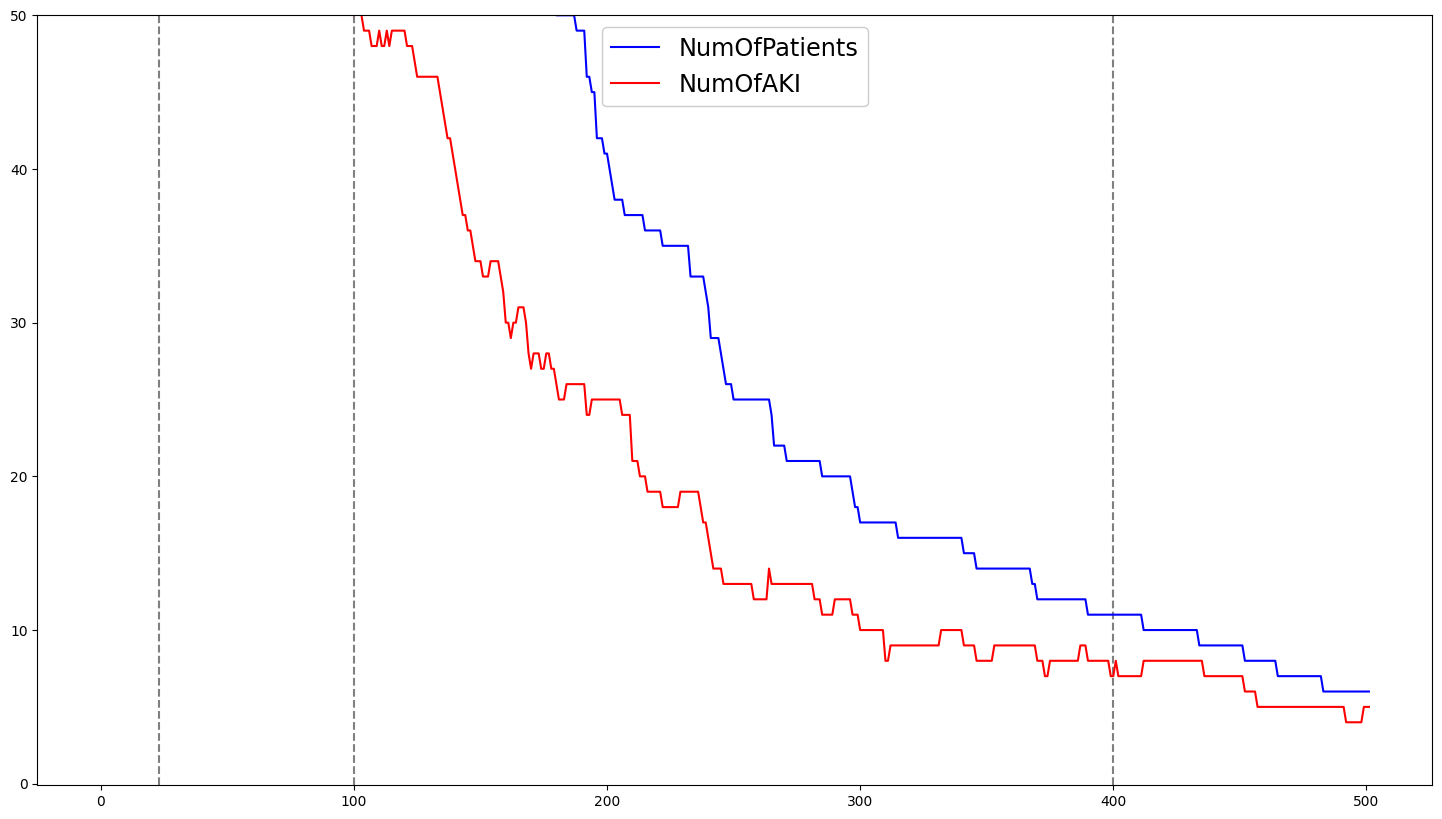

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1,1, figsize = (18,10), dpi = 100)

#axs.set_title(r'Trace plots of $\pi_j$' )
axs.set_ylim([-0.1,50])
#axs.set_xlim([-10,(maxiter+10)])
axs.axvline( x = 23, color = 'gray', linestyle = '--')
axs.axvline( x = 100, color = 'gray', linestyle = '--')
axs.axvline( x = 400, color = 'gray', linestyle = '--')

axs.plot( time_records_table['time'], time_records_table['NumOfPatients'], color = 'blue', label = 'NumOfPatients')
axs.plot( time_records_table['time'], time_records_table['NumOfAKI'], color = 'red', label = 'NumOfAKI')
axs.legend( loc = 'upper center', framealpha = 1, fontsize = 'xx-large')

# plt.show()
plt.savefig( './plots/ns_400.png', dpi = 100, bbox_inches = 'tight')


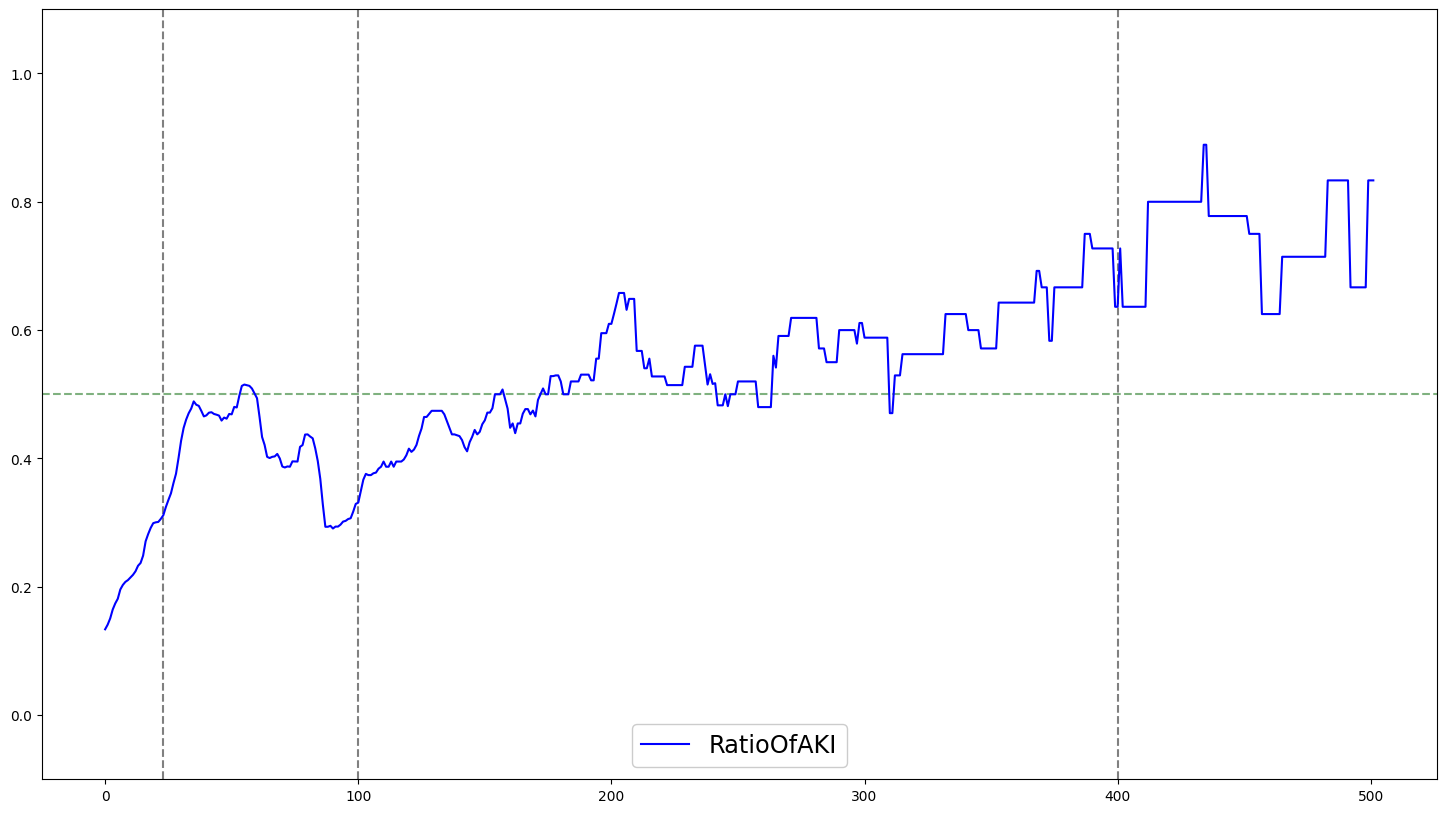

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1,1, figsize = (18,10), dpi = 100)

#axs.set_title(r'Trace plots of $\pi_j$' )
axs.set_ylim([-0.1,1.1])
#axs.set_xlim([-10,(maxiter+10)])
axs.axvline( x = 23, color = 'gray', linestyle = '--')
axs.axhline( y = 0.5 ,color = 'darkgreen', linestyle = '--', alpha = 0.5)

axs.axvline( x = 100, color = 'gray', linestyle = '--')
axs.axvline( x = 400, color = 'gray', linestyle = '--')

axs.plot( time_records_table['time'], time_records_table['RatioOfAKI'], color = 'blue', label = 'RatioOfAKI')
axs.legend( loc = 'lower center', framealpha = 1, fontsize = 'xx-large')

# plt.show()
plt.savefig( './plots/nsr.png', dpi = 100, bbox_inches = 'tight')


In [ ]:
hadm_list = np.unique( test['hadm_id']).astype('int')
inform = pd.read_pickle('inform.pkl')

In [ ]:

hat_y = pd.read_pickle('pred.pkl')
hadm_list = np.unique( test['hadm_id'])
tem_detect = pd.concat( [test[ ['hadm_id','time']], pd.DataFrame(hat_y) ], axis = 1)
updated_inform = pd.DataFrame( columns = ['hadm_id', 'if_AKI_in_ICU', 'first_AKI_detected', 'first_AKI_predicted']) 
for i in tqdm(hadm_list):
    if tem_detect.loc[ tem_detect['hadm_id'] == i, 'AKI_in_24'].max() == 0:
        new_inform = pd.DataFrame( data = np.append( inform.loc[ inform['hadm_id'] == i].values[0],  float('NaN')).reshape(1,-1),
                columns = ['hadm_id', 'if_AKI_in_ICU', 'first_AKI_detected', 'first_AKI_predicted'])
    else:
        new_inform = pd.DataFrame( data = np.append( inform.loc[ inform['hadm_id'] == i].values[0],  
                    tem_detect.loc[ (tem_detect['hadm_id'] == i) & (tem_detect['AKI_in_24'] == 1), 'time'].min()).reshape(1,-1),
            columns = ['hadm_id', 'if_AKI_in_ICU', 'first_AKI_detected', 'first_AKI_predicted'])
        
    updated_inform = pd.concat( [updated_inform, new_inform], ignore_index = True)

FileNotFoundError: [Errno 2] No such file or directory: 'pred.pkl'

# Pie charts showing accuracy percentages

In [ ]:
early_detection = updated_inform.dropna()['first_AKI_detected'].values - updated_inform.dropna()['first_AKI_predicted'].values 

In [ ]:
updated_inform.to_pickle('./updated_inform.pkl')

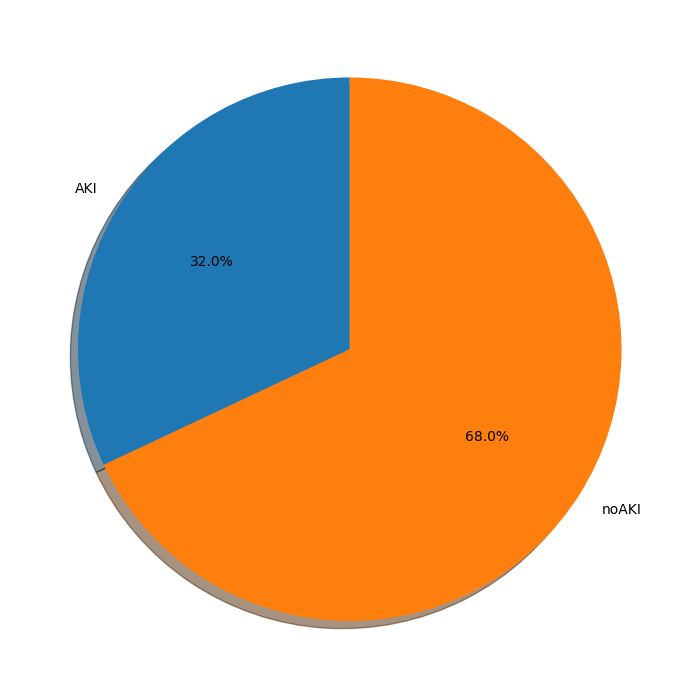

In [ ]:
%matplotlib inline

labels = 'AKI', 'noAKI'
sizes = [(updated_inform['if_AKI_in_ICU'] == 1).sum(), (updated_inform['if_AKI_in_ICU']==0).sum()]

fig, axs = plt.subplots(1,1, figsize = (9,9), dpi = 100)
fig.patch.set_facecolor('blue')


axs.pie( sizes, labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=90)


# plt.show()
plt.savefig( './plots/aki.png', dpi = 100, bbox_inches = 'tight')


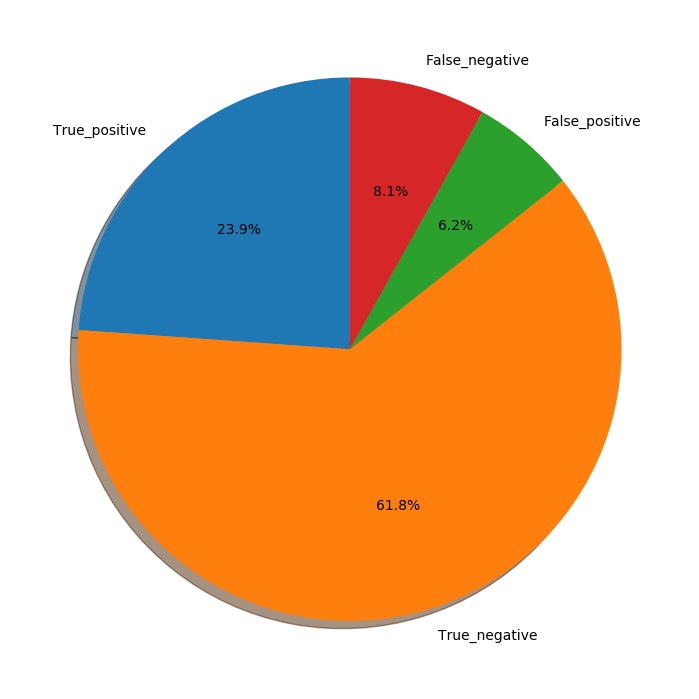

In [ ]:
%matplotlib inline

labels = 'True_positive', 'True_negative','False_positive', 'False_negative'
sizes = [((~updated_inform['first_AKI_detected'].isna()) & (~updated_inform['first_AKI_predicted'].isna())).sum(),
         ((updated_inform['first_AKI_detected'].isna()) & (updated_inform['first_AKI_predicted'].isna())).sum(),
         ((updated_inform['first_AKI_detected'].isna()) & (~updated_inform['first_AKI_predicted'].isna())).sum(),
         ((~updated_inform['first_AKI_detected'].isna()) & (updated_inform['first_AKI_predicted'].isna())).sum()]

fig, axs = plt.subplots(1,1, figsize = (9,9), dpi = 100)

axs.pie( sizes, labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=90)


# plt.show()
plt.savefig( './plots/tpfn.png', dpi = 100, bbox_inches = 'tight')


In [ ]:
updated_inform.drop('if_AKI_in_ICU',axis = 1).dropna()

,hadm_id,first_AKI_detected,first_AKI_predicted
2,20017597.0,36.0,45.0
3,20022292.0,39.0,38.0
4,20022786.0,18.0,17.0
9,20044799.0,4.0,3.0
14,20100436.0,53.0,62.0
...,...,...,...
1202,29840380.0,16.0,15.0
1205,29879839.0,11.0,12.0
1208,29893682.0,32.0,31.0
1209,29910384.0,9.0,8.0


In [ ]:
early_detection = updated_inform.dropna()['first_AKI_detected'].values - updated_inform.dropna()['first_AKI_predicted'].values

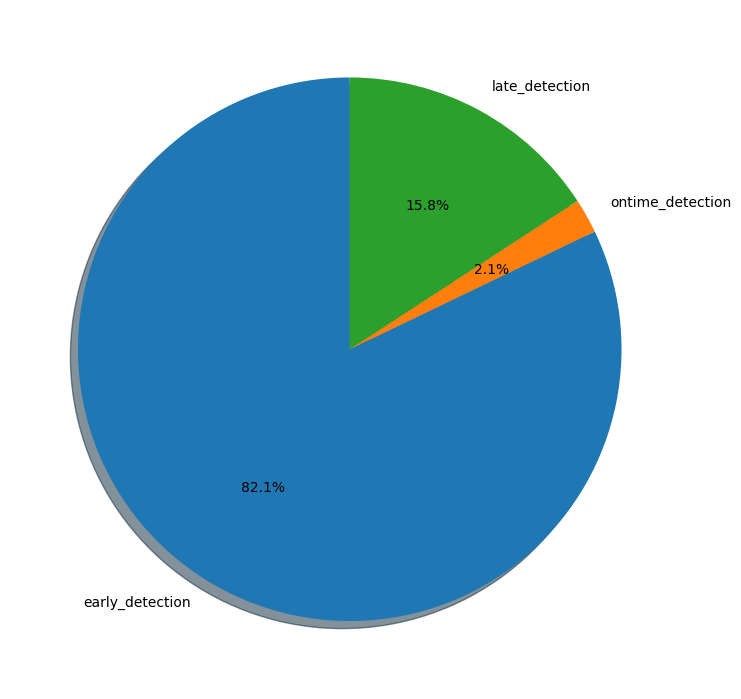

In [ ]:
%matplotlib inline

labels = 'early_detection', 'ontime_detection','late_detection'
sizes = [(early_detection > 0 ).sum(),
         (early_detection == 0).sum(),
         (early_detection < 0).sum()]

fig, axs = plt.subplots(1,1, figsize = (9,9), dpi = 100)

axs.pie( sizes, labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=90)


# plt.show()
plt.savefig( './plots/detection.png', dpi = 100, bbox_inches = 'tight')


In [ ]:
early_hours = []
frequency = []

In [ ]:
for i in np.unique(early_detection):
    early_hours.append(i)
    frequency.append( early_detection.tolist().count(i) )

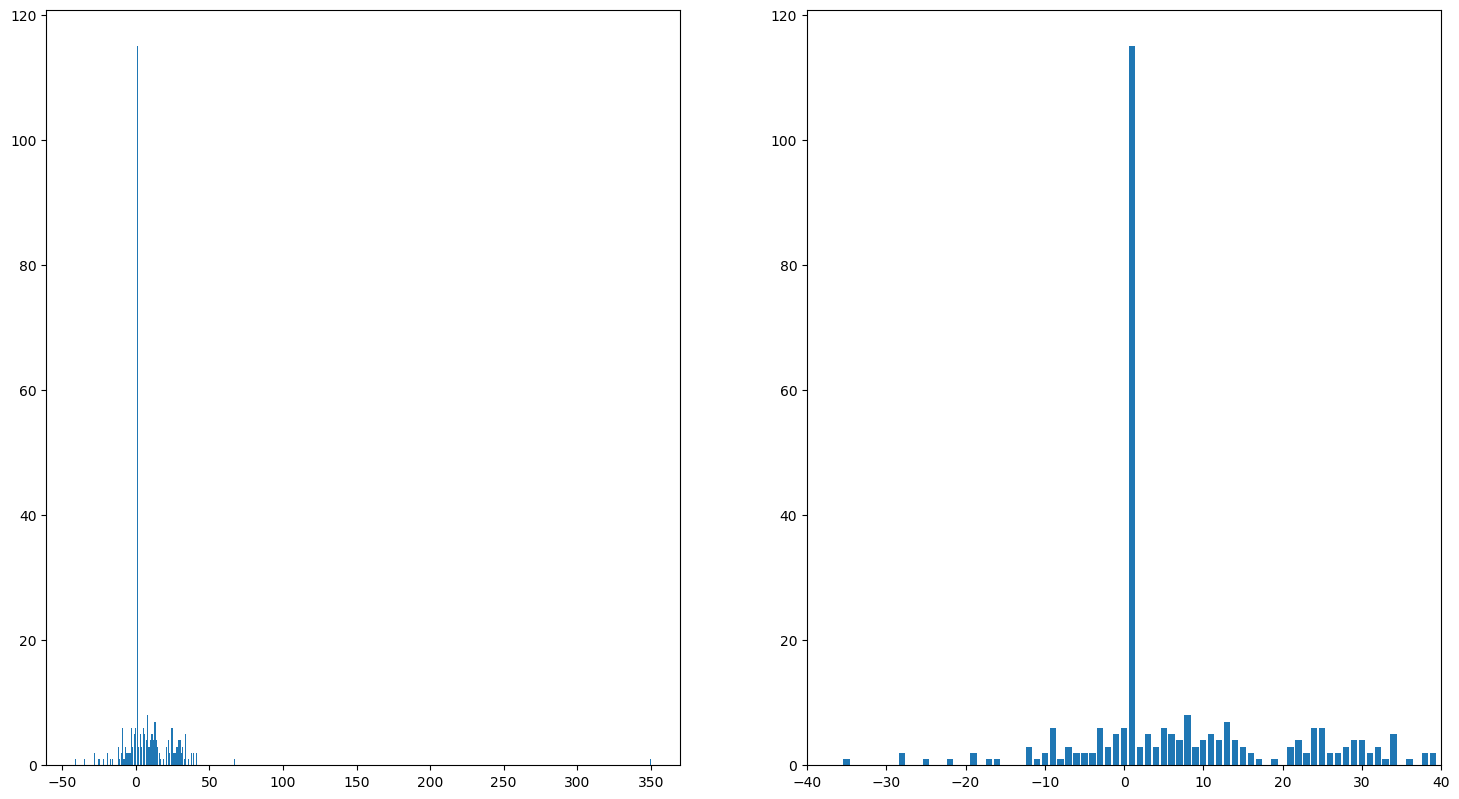

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1,2, figsize = (18,10), dpi = 100)

# axs.set_title(r'Trace plots of $\pi_j$' )
# axs.set_ylim([-0.1,1.1])
# axs.set_xlim([-10,(maxiter+10)])
# axs.axvline( x = 23, color = 'gray', linestyle = '--')
# axs.axhline( y = 0.5 ,color = 'darkgreen', linestyle = '--', alpha = 0.5)
# axs.axvline( x = 100, color = 'gray', linestyle = '--')
# axs.axvline( x = 400, color = 'gray', linestyle = '--')

axs[0].bar( early_hours, frequency)

axs[1].set_xlim([-40,40])
axs[1].bar( early_hours, frequency)
# plt.show()
plt.savefig( './plots/detect_hist.png', dpi = 10S0, bbox_inches = 'tight')


In [ ]:
 (updated_inform.dropna()['first_AKI_detected'].values - updated_inform.dropna()['first_AKI_predicted'].values) <= 0

array([ True, False, False, False,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
        True, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
updated_inform.dropna().loc[  (updated_inform.dropna()['first_AKI_detected'].values - updated_inform.dropna()['first_AKI_predicted'].values) <= 1 ]

,hadm_id,if_AKI_in_ICU,first_AKI_detected,first_AKI_predicted
2,20017597.0,1.0,36.0,45.0
3,20022292.0,1.0,39.0,38.0
4,20022786.0,1.0,18.0,17.0
9,20044799.0,1.0,4.0,3.0
14,20100436.0,1.0,53.0,62.0
...,...,...,...,...
1202,29840380.0,1.0,16.0,15.0
1205,29879839.0,1.0,11.0,12.0
1208,29893682.0,1.0,32.0,31.0
1209,29910384.0,1.0,9.0,8.0


In [ ]:
np.mean( updated_inform.dropna().loc[  (updated_inform.dropna()['first_AKI_detected'].values - updated_inform.dropna()['first_AKI_predicted'].values) <= 1, 'first_AKI_detected' ] < 24)

0.5748502994011976